In [1]:
%tensorflow_version 2.x
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
%matplotlib inline

TensorFlow 2.x selected.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Load dataset
names = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/capstone2/names.csv')
names['Name'] = names['Name'].str.strip()
names['Name'] = names['Name'].str.lower()
names['FirstLetter'] = names['FirstLetter'].str.lower()

In [4]:
names.head(5)

,Name,Gender,LastLetter,LastTwoLetter,FirstLetter
0,ashutosh,1,h,sh,a
1,meghamala,2,a,la,m
2,sahib,1,b,ib,s
3,pragya,2,a,ya,p
4,kranti,2,i,ti,k


# Naive Bayes on the last letter

In [0]:
from sklearn.preprocessing import OneHotEncoder

last_letter = names.LastLetter.values
encoder = OneHotEncoder()
last_letter_encoded = encoder.fit_transform(last_letter.reshape(-1, 1)).toarray()

In [6]:
last_letter_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [7]:
np.shape(last_letter_encoded)

(5027, 23)

In [0]:
labels = names.Gender.values

In [9]:
labels

array([1, 2, 1, ..., 2, 2, 2])

In [10]:
np.shape(labels)

(5027,)

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(last_letter_encoded, 
                                                    labels, 
                                                    test_size = 0.3,
                                                    stratify = labels)

nb_clf = MultinomialNB()

# Fit the model on the trainng data.
nb_clf.fit(X_train, y_train)

# Print the accuracy from the training data.
print('The mean accuracy on the given train data and labels = ' + 
      str(nb_clf.score(X_train, y_train)))

# Print the accuracy from the testing data.
print('The mean accuracy on the given test data and labels = ' + 
      str(nb_clf.score(X_test, y_test)))

print('Precision: %.3f' % precision_score(y_true=y_test, 
                                          y_pred=nb_clf.predict(X_test)))
print('Recall: %.3f' % recall_score(y_true=y_test, 
                                    y_pred=nb_clf.predict(X_test)))
print('F1: %.3f' % f1_score(y_true=y_test, 
                            y_pred=nb_clf.predict(X_test)))

The mean accuracy on the given train data and labels = 0.8220579874928937
The mean accuracy on the given test data and labels = 0.8184227965540093
Precision: 0.908
Recall: 0.731
F1: 0.810


# Naive Bayes on the last two letters

In [0]:
last_two_letters = names.LastTwoLetter.values
last_two_letters_enc = encoder.fit_transform(last_two_letters.reshape(-1, 1)).toarray()

In [13]:
last_two_letters_enc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
np.shape(last_two_letters_enc)

(5027, 172)

In [15]:
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(last_two_letters_enc, 
                                                    labels, 
                                                    test_size = 0.3,
                                                    stratify = labels)

# Fit the model on the trainng data.
nb_clf.fit(X_train, y_train)

# Print the accuracy from the training data.
print('The mean accuracy on the given train data and labels = ' + 
      str(nb_clf.score(X_train, y_train)))

# Print the accuracy from the testing data.
print('The mean accuracy on the given test data and labels = ' + 
      str(nb_clf.score(X_test, y_test)))

print('Precision: %.3f' % precision_score(y_true=y_test, 
                                          y_pred=nb_clf.predict(X_test)))
print('Recall: %.3f' % recall_score(y_true=y_test, 
                                    y_pred=nb_clf.predict(X_test)))
print('F1: %.3f' % f1_score(y_true=y_test, 
                            y_pred=nb_clf.predict(X_test)))

The mean accuracy on the given train data and labels = 0.8354178510517339
The mean accuracy on the given test data and labels = 0.832339297548045
Precision: 0.881
Recall: 0.790
F1: 0.833


# Naive Bayes on the first letter

In [0]:
first_letter = names.FirstLetter.values
first_letter_enc = encoder.fit_transform(first_letter.reshape(-1, 1)).toarray()

In [17]:
np.shape(first_letter_enc)

(5027, 26)

In [18]:
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(first_letter_enc, 
                                                    labels, 
                                                    test_size = 0.3,
                                                    stratify = labels)

# Fit the model on the trainng data.
nb_clf.fit(X_train, y_train)

# Print the accuracy from the training data.
print('The mean accuracy on the given train data and labels = ' + 
      str(nb_clf.score(X_train, y_train)))

# Print the accuracy from the testing data.
print('The mean accuracy on the given test data and labels = ' + 
      str(nb_clf.score(X_test, y_test)))

print('Precision: %.3f' % precision_score(y_true=y_test, 
                                          y_pred=nb_clf.predict(X_test)))
print('Recall: %.3f' % recall_score(y_true=y_test, 
                                    y_pred=nb_clf.predict(X_test)))
print('F1: %.3f' % f1_score(y_true=y_test, 
                            y_pred=nb_clf.predict(X_test)))

The mean accuracy on the given train data and labels = 0.553439454235361
The mean accuracy on the given test data and labels = 0.5480450629555997
Precision: 0.568
Recall: 0.608
F1: 0.588


# Multilayer perceptron

In [19]:
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
print(tf.__version__)

2.1.0


**Create new features using TfidfVectorizer** 

In [0]:
def make_features_target(df, vectorizer=None):    
    if vectorizer is None:
        vectorizer = TfidfVectorizer(min_df=0.0, 
                                     analyzer='char',
                                     ngram_range=(1, 2))
    features = vectorizer.fit_transform(df.Name).toarray()
    target = (df.Gender == 1).values.astype(np.int)
    return features, target

In [0]:
features, target = make_features_target(names)

In [65]:
np.shape(features)

(5027, 501)

#Creating tensors from numpy arrays and combining them in one dataset

In [0]:
ds = tf.data.Dataset.from_tensor_slices((features, target))

# Train, validation, test splits.

In [0]:
tf.random.set_seed(1)

ds = ds.shuffle(len(features), reshuffle_each_iteration=False)

ds_test = ds.take(int(0.5 * len(features)))
ds_train_orig = ds.skip(int(0.5 * len(features)))

In [68]:
ds_train_orig

<SkipDataset shapes: ((501,), ()), types: (tf.float64, tf.int64)>

In [69]:
n = 0
for example in ds_train_orig:
    n += 1
print(n)


n = 0
for example in ds_test:
    n += 1
print(n)

2514
2513


In [72]:
mlp_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, 
                          activation='sigmoid', 
                          name='fully_connected1', 
                          input_shape=(np.shape(features)[1],)),
    tf.keras.layers.Dense(2, 
                          name='fully_connected2', 
                          activation='softmax')])

mlp_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fully_connected1 (Dense)     (None, 100)               50200     
_________________________________________________________________
fully_connected2 (Dense)     (None, 2)                 202       
Total params: 50,402
Trainable params: 50,402
Non-trainable params: 0
_________________________________________________________________


In [0]:
mlp_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [74]:
num_epochs = 30
training_size = int(0.5 * len(features))
batch_size = 2
steps_per_epoch = np.ceil(training_size / batch_size)

ds_train = ds_train_orig.shuffle(buffer_size=training_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size=batch_size)
ds_train = ds_train.prefetch(buffer_size=1000)

history = mlp_model.fit(ds_train, 
                        epochs=num_epochs,
                        steps_per_epoch=steps_per_epoch)

Train for 1257.0 steps
Epoch 1/30
1257/1257 [==============================] - 4s 3ms/step - loss: 0.6727 - accuracy: 0.5839
Epoch 2/30
1257/1257 [==============================] - 3s 3ms/step - loss: 0.6115 - accuracy: 0.6659
Epoch 3/30
1257/1257 [==============================] - 3s 3ms/step - loss: 0.5660 - accuracy: 0.7164
Epoch 4/30
1257/1257 [==============================] - 3s 3ms/step - loss: 0.5284 - accuracy: 0.7407
Epoch 5/30
1257/1257 [==============================] - 3s 3ms/step - loss: 0.4949 - accuracy: 0.7697
Epoch 6/30
1257/1257 [==============================] - 3s 3ms/step - loss: 0.4667 - accuracy: 0.7864
Epoch 7/30
1257/1257 [==============================] - 4s 3ms/step - loss: 0.4451 - accuracy: 0.7963
Epoch 8/30
1257/1257 [==============================] - 3s 3ms/step - loss: 0.4241 - accuracy: 0.8142
Epoch 9/30
1257/1257 [==============================] - 3s 3ms/step - loss: 0.4099 - accuracy: 0.8178
Epoch 10/30
1257/1257 [==============================] - 3s

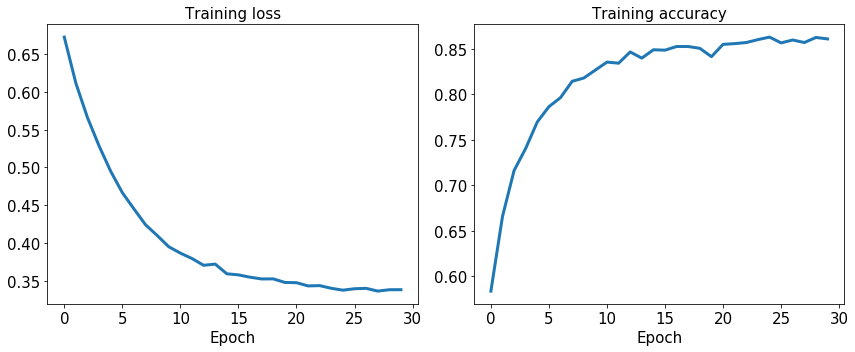

In [75]:
hist = history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

plt.show()

In [76]:
mlp_results = mlp_model.evaluate(ds_test.batch(int(len(features)*0.5)))
print('Test loss: {:.4f}   Test Acc.: {:.4f}'.format(*mlp_results))

1/1 [==============================] - 0s 84ms/step - loss: 0.5777 - accuracy: 0.8010
Test loss: 0.5777   Test Acc.: 0.8010


# Simple RNN network.

In [96]:
tf.random.set_seed(1)

embedding_dim = 30
vocab_size = np.shape(features)[1]

rnn_model = Sequential()
rnn_model.add(Embedding(vocab_size, embedding_dim))
rnn_model.add(SimpleRNN(50, return_sequences=False))
rnn_model.add(Dense(50, activation = 'relu'))
rnn_model.add(Dense(2, activation = 'softmax'))
rnn_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 30)          15030     
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 50)                4050      
_________________________________________________________________
dense_17 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 102       
Total params: 21,732
Trainable params: 21,732
Non-trainable params: 0
_________________________________________________________________


In [0]:
rnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [98]:
num_epochs = 10
training_size = int(0.5 * len(features))
batch_size = 16
steps_per_epoch = np.ceil(training_size / batch_size)

ds_train = ds_train_orig.shuffle(buffer_size=training_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size=batch_size)
ds_train = ds_train.prefetch(buffer_size=1000)

history = rnn_model.fit(ds_train, 
                        epochs=num_epochs,
                        steps_per_epoch=steps_per_epoch)

Train for 158.0 steps
Epoch 1/10
158/158 [==============================] - 54s 344ms/step - loss: 0.6943 - accuracy: 0.5190
Epoch 2/10
158/158 [==============================] - 54s 342ms/step - loss: 0.6925 - accuracy: 0.5269
Epoch 3/10
158/158 [==============================] - 54s 341ms/step - loss: 0.6927 - accuracy: 0.5261
Epoch 4/10
158/158 [==============================] - 53s 334ms/step - loss: 0.6923 - accuracy: 0.5289
Epoch 5/10
158/158 [==============================] - 53s 333ms/step - loss: 0.6919 - accuracy: 0.5301
Epoch 6/10
158/158 [==============================] - 54s 339ms/step - loss: 0.6919 - accuracy: 0.5293
Epoch 7/10
158/158 [==============================] - 54s 340ms/step - loss: 0.6917 - accuracy: 0.5293
Epoch 8/10
158/158 [==============================] - 54s 342ms/step - loss: 0.6914 - accuracy: 0.5332
Epoch 9/10
158/158 [==============================] - 52s 327ms/step - loss: 0.6927 - accuracy: 0.5229
Epoch 10/10
158/158 [==============================

In [99]:
## evaluate on the test data
test_results= rnn_model.evaluate(ds_test.batch(int(len(features)*0.5)))
print('Test Acc.: {:.2f}%'.format(test_results[1]*100))

1/1 [==============================] - 0s 248ms/step - loss: 0.6917 - accuracy: 0.5292
Test Acc.: 52.92%


# Bidirectional with LSTM layer.

In [90]:
embedding_dim = 30
vocab_size = np.shape(features)[1] + 2

## build the model
bi_lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        name='embed-layer'),
    
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64, name='lstm-layer'),
        name='bidir-lstm'), 

    tf.keras.layers.Dense(64, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

bi_lstm_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed-layer (Embedding)      (None, None, 30)          15090     
_________________________________________________________________
bidir-lstm (Bidirectional)   (None, 128)               48640     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 72,051
Trainable params: 72,051
Non-trainable params: 0
_________________________________________________________________


In [91]:
tf.random.set_seed(1)

num_epochs = 10
training_size = int(0.5 * len(features))
batch_size = 16
steps_per_epoch = np.ceil(training_size / batch_size)

## compile and train:
bi_lstm_model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                      loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                      metrics=['accuracy'])

history = bi_lstm_model.fit(ds_train, 
                            epochs=num_epochs,
                            steps_per_epoch = steps_per_epoch)


Train for 158.0 steps
Epoch 1/10
158/158 [==============================] - 8s 50ms/step - loss: 0.6925 - accuracy: 0.5273
Epoch 2/10
158/158 [==============================] - 6s 36ms/step - loss: 0.6918 - accuracy: 0.5305
Epoch 3/10
158/158 [==============================] - 6s 37ms/step - loss: 0.6920 - accuracy: 0.5281
Epoch 4/10
158/158 [==============================] - 6s 37ms/step - loss: 0.6916 - accuracy: 0.5336
Epoch 5/10
158/158 [==============================] - 6s 36ms/step - loss: 0.6919 - accuracy: 0.5293
Epoch 6/10
158/158 [==============================] - 6s 36ms/step - loss: 0.6918 - accuracy: 0.5297
Epoch 7/10
158/158 [==============================] - 6s 36ms/step - loss: 0.6921 - accuracy: 0.5257
Epoch 8/10
158/158 [==============================] - 5s 34ms/step - loss: 0.6910 - accuracy: 0.5344
Epoch 9/10
158/158 [==============================] - 5s 33ms/step - loss: 0.6912 - accuracy: 0.5328
Epoch 10/10
158/158 [==============================] - 5s 33ms/step -

In [101]:
## evaluate on the test data
test_results= bi_lstm_model.evaluate(ds_test.batch(int(len(features)*0.5)))
print('Test Acc.: {:.2f}%'.format(test_results[1]*100))

1/1 [==============================] - 0s 305ms/step - loss: 0.6916 - accuracy: 0.5292
Test Acc.: 52.92%
